# Random Forest Model
Run through an initial look at the positive data classes.  
Then evaluate a Random Forest Model using cross validation.  
Finally evaluate on the test data set.  

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/panic-disorder-detection-dataset/panic_disorder_dataset_training.csv
/kaggle/input/panic-disorder-detection-dataset/panic_disorder_dataset_testing.csv


In [2]:
import scipy

In [3]:
df = pd.read_csv("/kaggle/input/panic-disorder-detection-dataset/panic_disorder_dataset_training.csv")

In [4]:
df.columns

Index(['Participant ID', 'Age', 'Gender', 'Family History', 'Personal History',
       'Current Stressors', 'Symptoms', 'Severity', 'Impact on Life',
       'Demographics', 'Medical History', 'Psychiatric History',
       'Substance Use', 'Coping Mechanisms', 'Social Support',
       'Lifestyle Factors', 'Panic Disorder Diagnosis'],
      dtype='object')

In [5]:
y = df["Panic Disorder Diagnosis"]
X = df.drop(columns=["Panic Disorder Diagnosis", "Participant ID"])

# Make up of Positive Classes
Looking at what columns are associated with the positive class.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df.columns

Index(['Participant ID', 'Age', 'Gender', 'Family History', 'Personal History',
       'Current Stressors', 'Symptoms', 'Severity', 'Impact on Life',
       'Demographics', 'Medical History', 'Psychiatric History',
       'Substance Use', 'Coping Mechanisms', 'Social Support',
       'Lifestyle Factors', 'Panic Disorder Diagnosis'],
      dtype='object')

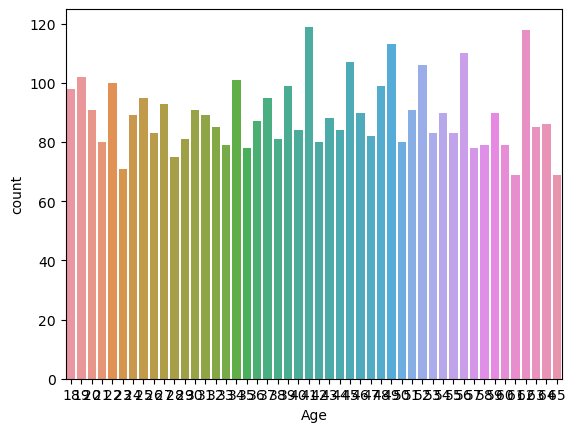

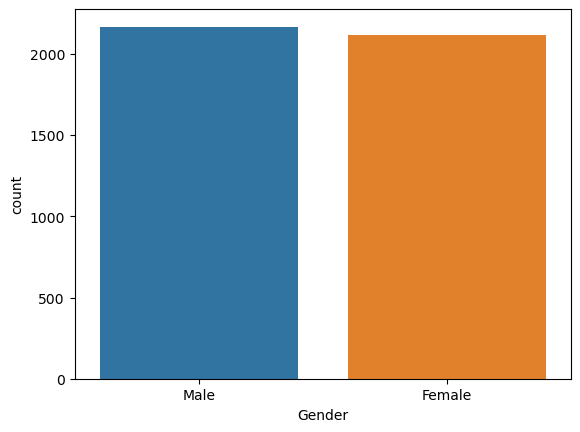

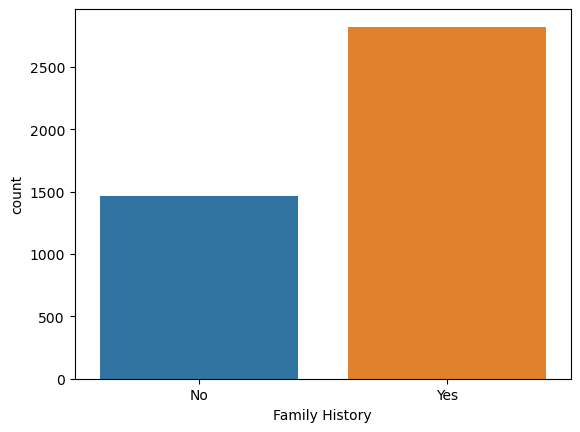

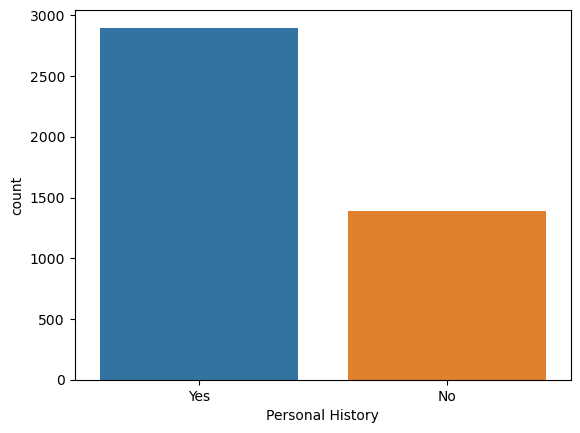

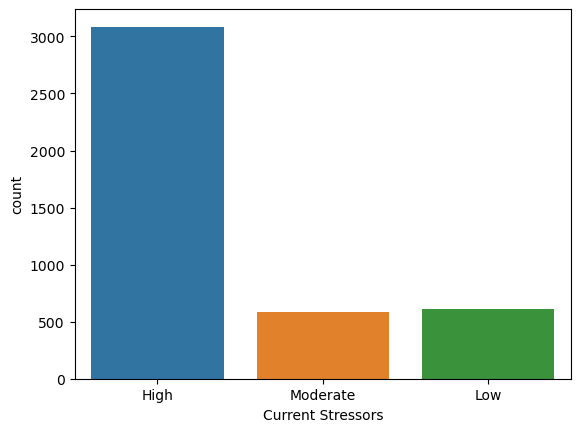

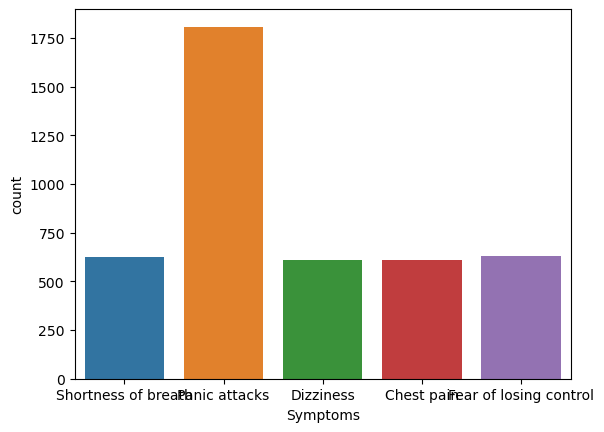

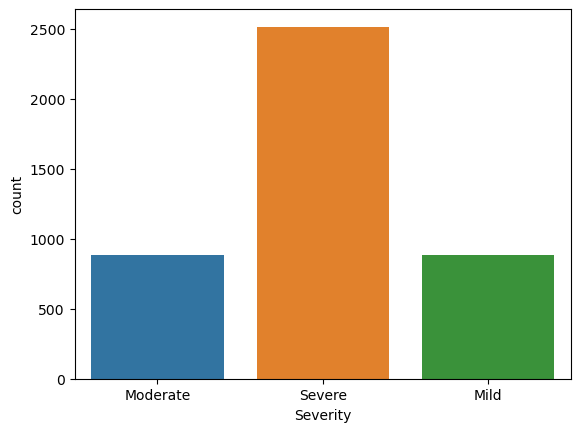

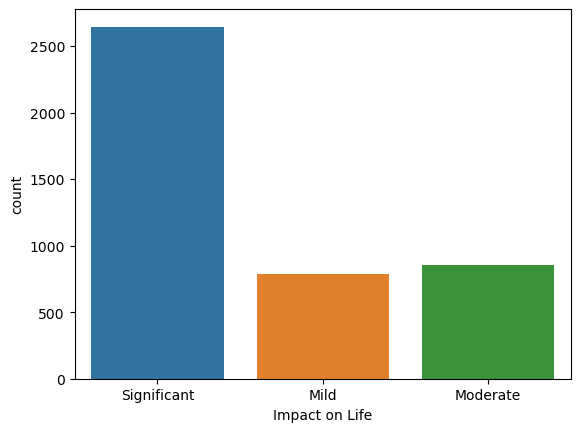

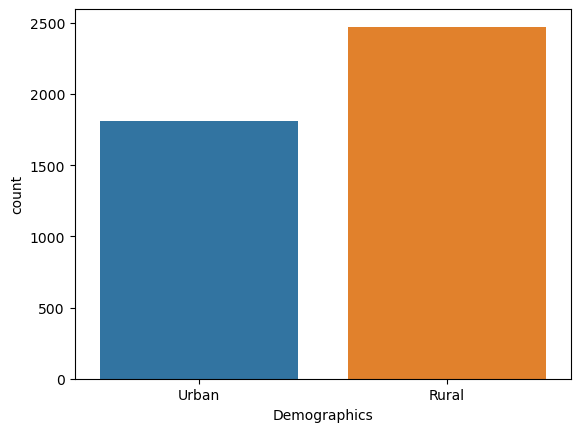

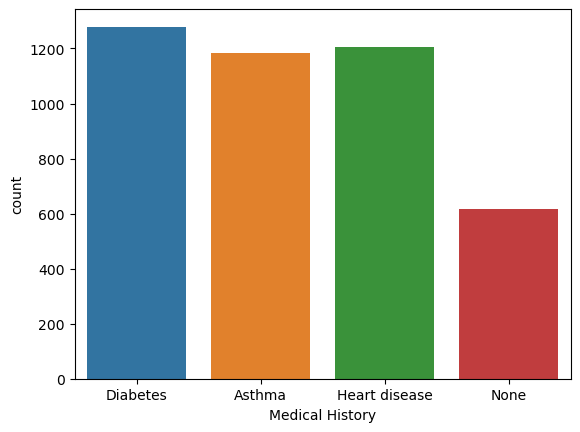

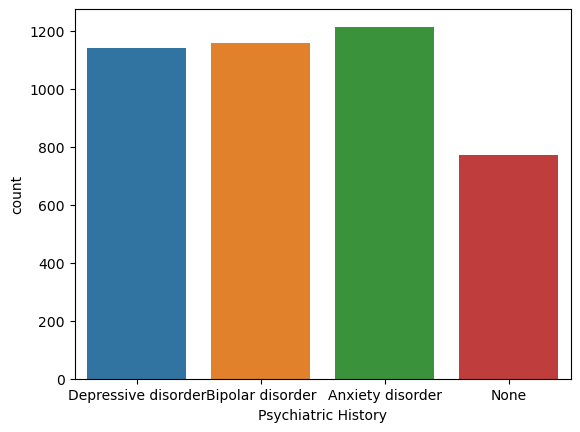

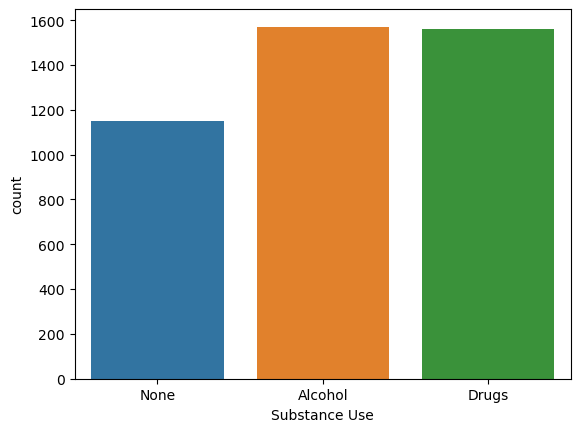

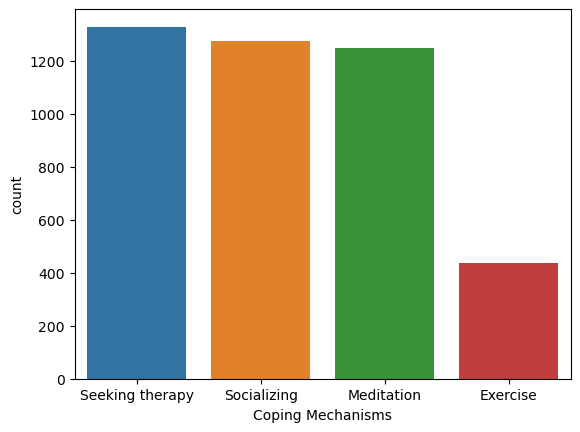

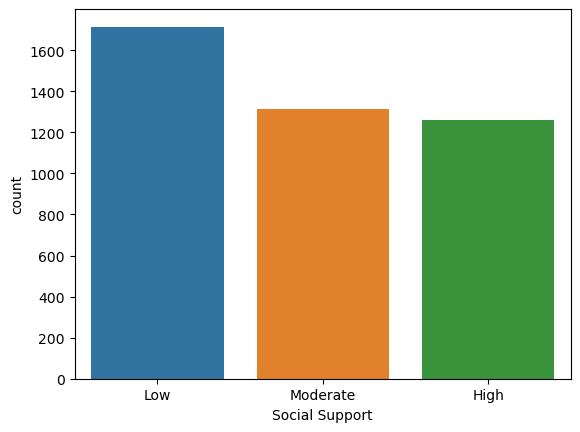

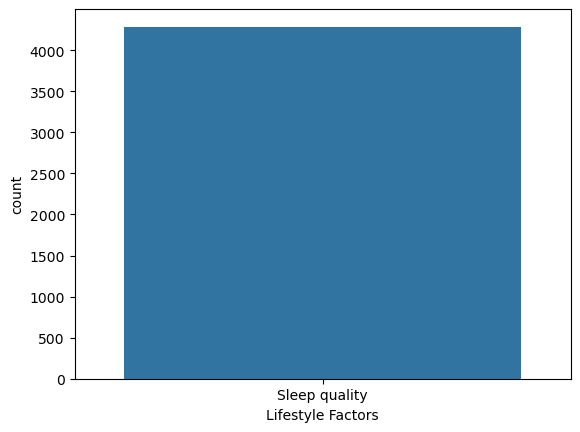

In [8]:
for col in df.columns:
    if col == "Participant ID" or col == "Panic Disorder Diagnosis":
        continue
    fig, ax = plt.subplots(1,1)
    sns.countplot(df[df["Panic Disorder Diagnosis"]==1], x=col)

# Random Forest Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [10]:
X = pd.get_dummies(X, columns=["Gender","Family History","Personal History","Current Stressors","Symptoms", "Severity", "Impact on Life","Demographics","Medical History","Psychiatric History","Substance Use","Coping Mechanisms","Social Support", "Lifestyle Factors"])

In [11]:
clf = RandomForestClassifier(random_state=13)
scores = cross_val_score(clf, X, y, cv=5)

In [12]:
#Cross Validation Scores
scores

array([0.99965, 0.9995 , 0.9992 , 0.99955, 0.9998 ])

In [13]:
clf.fit(X, y)

RandomForestClassifier(random_state=13)

# Evaluation on Test Set
99% score

In [14]:
test_df = pd.read_csv("/kaggle/input/panic-disorder-detection-dataset/panic_disorder_dataset_testing.csv")

In [15]:
y_test = test_df["Panic Disorder Diagnosis"]
X_test = test_df.drop(columns=["Panic Disorder Diagnosis", "Participant ID"])
X_test = pd.get_dummies(X_test, columns=["Gender","Family History","Personal History","Current Stressors","Symptoms", "Severity", "Impact on Life","Demographics","Medical History","Psychiatric History","Substance Use","Coping Mechanisms","Social Support", "Lifestyle Factors"])

In [16]:
clf.score(X_test, y_test)

0.99955

In [17]:
y_pred = clf.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19159
           1       1.00      0.99      0.99       841

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

